In [ ]:
# 1->

# Import for pandas
import pandas as pd

# Read the training dataset where ; is the separator and label the columns as Input and Sentiment
# df_train = pd.read_csv('dataset/train.txt', header=None, sep=';', names=['Input','Sentiment'], encoding='utf-8')


# Temporarily reading the raw data from github for convineince
df_train = pd.read_csv("https://raw.githubusercontent.com/jaiswalshubhangi/Emotional-Analysis/main/dataset/train.txt",  header=None, sep=';', names=['Input','Sentiment'] , encoding='utf-8')

# Display the header
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
# 2->

# Read the testing dataset where ; is the separator and label the columns as Input and Sentiment
df_test = pd.read_csv('https://raw.githubusercontent.com/jaiswalshubhangi/Emotional-Analysis/main/dataset/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
# Display the header
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
# 3->

# Read the validation dataset where ; is the separator and label the columns as Input and Sentiment
df_val = pd.read_csv('https://raw.githubusercontent.com/jaiswalshubhangi/Emotional-Analysis/main/dataset/val.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
# Display the header
df_val.head()

,Input,Sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
# 4->

# Display the unique values for column Sentiment
df_train.Sentiment.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

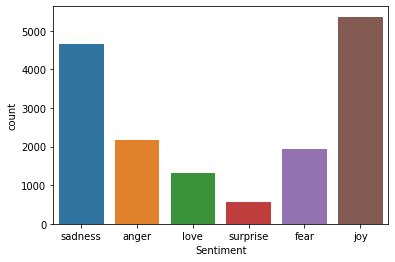

In [ ]:
# 5->

# Import for seaborn
import seaborn as sns
# Countplot for Sentiment column in the training dataset
sns.countplot(x="Sentiment",data=df_train);

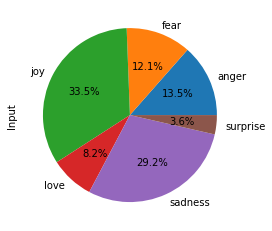

In [ ]:
# 6->

# Group training data by Sentiment and get the counts
data = df_train.groupby("Sentiment")["Input"].count()
# Plot a pie chart of the data obtained
data.plot.pie(autopct="%.1f%%");

In [ ]:
# 7->

# Import for Numpy
import numpy as np
# Display unique values for column Sentiment in the training dataset 
np.unique(df_train['Sentiment'])
# Perform Ordinal Encoding - assign integers to label based on categories
df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

In [ ]:
# 8->

# Display the header for training data
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


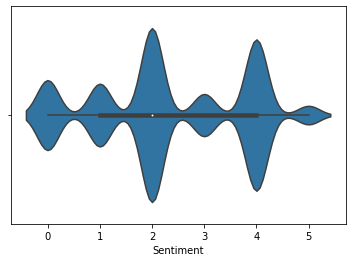

In [ ]:
# 9->

# Violinplot for Sentiment column in the training dataset
sns.violinplot(x="Sentiment",data=df_train);

In [ ]:
# 10->

# Display the column Sentiment from training data
df_train.Sentiment

0        4
1        4
2        0
3        3
4        0
        ..
15995    4
15996    4
15997    2
15998    0
15999    4
Name: Sentiment, Length: 16000, dtype: int64

In [ ]:
# 11->

# Find the total rows with null values in training data
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [ ]:
# 12->

# Information on training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [ ]:
# 13->

# Description of training data
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [ ]:
# 14->

# Use column Input as independent variable
x = df_train["Input"]
# Use column Sentiment as dependent variable
y = df_train["Sentiment"]
# Display the dimensions of independent and dependent variables
print(x.shape,y.shape)

(16000,) (16000,)


In [ ]:
# 15->

x_test = df_test["Input"]
y_test = df_test["Sentiment"]

print(x_test.shape,y_test.shape)

(2000,) (2000,)


In [ ]:
# 16->

x_val = df_val["Input"]
y_val = df_val["Sentiment"]

print(x_val.shape,y_val.shape)

(2000,) (2000,)


In [ ]:
# 17->

# Copy the contents of x to message
message = x.copy()
# Set vocabulary size to 10000
voc_size = 10000
# Display the first row of message - dependent variable
message[0]

'i didnt feel humiliated'

In [ ]:
# 18->

test_message = x_test.copy()
# Set vocabulary size to 10000
test_voc_size = 10000
# Display the first row of message - dependent variable
test_message[0]

'im feeling rather rotten so im not very ambitious right now'

In [ ]:
# 19->

val_message = x_val.copy()
val_voc_size = 10000
val_message[0]

'im feeling quite sad and sorry for myself but ill snap out of it soon'

In [ ]:
# 20->

# Import Regular Expressions
import re
# Import NLTK
import nltk
nltk.download('stopwords')
# Import stopwords from nltk.corpus
from nltk.corpus import stopwords
# Import PorterStemmer from nltk.stem.porter
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# 21->

def data_preprocess(text):
  # Create a new Porter stemmer
  ps = PorterStemmer()
  # Create a empty list
  corpus = []
  # Iterate over all messages
  for i in range(0, len(text)):
      # Replace non-numeric characters with empty space and save as review
      review = re.sub('[^a-zA-Z]', ' ', text[i])
      # Convert to lower case
      review = review.lower()
      # Splits a string into a list
      review = review.split()
      # Perform stemming on non-stop words
      review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
      # Takes all items in an iterable and joins them into one string
      review = ' '.join(review)
      # Append string to a list
      corpus.append(review)
  # Return the pre-processed corpus
  return corpus

In [ ]:
# 22->

message[0], test_message[0], val_message[0]

('i didnt feel humiliated',
 'im feeling rather rotten so im not very ambitious right now',
 'im feeling quite sad and sorry for myself but ill snap out of it soon')

In [ ]:
# 23->

train_corpus = data_preprocess(message)
test_corpus = data_preprocess(test_message)
val_corpus = data_preprocess(val_message)

In [ ]:
# 24->

train_corpus[0], test_corpus[0], val_corpus[0]

('didnt feel humili',
 'im feel rather rotten im ambiti right',
 'im feel quit sad sorri ill snap soon')

## New Training

In [ ]:
# 25->

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D,Flatten ,Input,Embedding,LSTM


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# 26->

vocab_size = 1000
train_len_sentence = len(max(train_corpus, key = len))
test_len_sentence = len(max(test_corpus, key = len))
val_len_sentence = len(max(val_corpus, key = len))

len_sentence = max(train_len_sentence, test_len_sentence, val_len_sentence)
len_sentence

208

In [ ]:
# 27->

one_hot_word1 = [one_hot(input_text=word, n=vocab_size) for word in train_corpus]
#One-hot encodes a text into a list of word indexes of size n.
X_Train2 = pad_sequences(sequences=one_hot_word1,
                              maxlen=len_sentence,
                              padding="pre")
#Pads sequences to the same length.

In [ ]:
# 29->

one_hot_word2 = [one_hot(input_text=word, n=vocab_size) for word in test_corpus]
#One-hot encodes a text into a list of word indexes of size n.
X_Test2 = pad_sequences(sequences=one_hot_word2,
                              maxlen=len_sentence,
                              padding="pre")

In [ ]:
# 30->

one_hot_word3 = [one_hot(input_text=word, n=vocab_size) for word in val_corpus]
#One-hot encodes a text into a list of word indexes of size n.
X_Val2 = pad_sequences(sequences=one_hot_word3,
                              maxlen=len_sentence,
                              padding="pre")

In [ ]:
# 31->

#Assumption
embed_dim = 150

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim,input_length = X_Train2.shape[1]))
#vocabSize:input_dim (Integer. Size of the vocabulary, i.e. maximum integer index + 1.)
#embed_dim:output_dim (Integer. Dimension of the dense embedding.)
#input_length: Length of input sequences
model.add(Dropout(0.2))#explained below
#Dropout(): Let's define 2D input: [[1, 1, 1], [2, 2, 2]]. 
#Dropout will consider every element independently, and may result in something like [[1, 0, 1], [0, 2, 2]]
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.3))        
model.add(Dense(6,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 208, 150)          150000    
                                                                 
 dropout (Dropout)           (None, 208, 150)          0         
                                                                 
 lstm (LSTM)                 (None, 200)               280800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 120)               24120     
                                                                 
 dropout_2 (Dropout)         (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 7

In [ ]:
# 32->

Ohe = OneHotEncoder()
Y_Train2 = np.array(y)
Y_Train2 = Ohe.fit_transform(Y_Train2.reshape(-1,1)).toarray()

Y_Test2 = np.array(y_test)
Y_Test2 = Ohe.fit_transform(Y_Test2.reshape(-1,1)).toarray()

Y_Val2 = np.array(y_val)
Y_Val2 = Ohe.fit_transform(Y_Val2.reshape(-1,1)).toarray()

In [ ]:
# 33->

batch_size = 30
M1=model.fit(X_Train2, Y_Train2, epochs = 10, batch_size=batch_size, verbose = 1,validation_data=(X_Val2,Y_Val2))

Epoch 1/10
534/534 [==============================] - 17s 17ms/step - loss: 1.3025 - accuracy: 0.4866 - val_loss: 0.7606 - val_accuracy: 0.7180
Epoch 2/10
534/534 [==============================] - 10s 18ms/step - loss: 0.6880 - accuracy: 0.7454 - val_loss: 0.6233 - val_accuracy: 0.7475
Epoch 3/10
534/534 [==============================] - 9s 16ms/step - loss: 0.5634 - accuracy: 0.7769 - val_loss: 0.5745 - val_accuracy: 0.7680
Epoch 4/10
534/534 [==============================] - 9s 17ms/step - loss: 0.5046 - accuracy: 0.7946 - val_loss: 0.5764 - val_accuracy: 0.7650
Epoch 5/10
534/534 [==============================] - 9s 16ms/step - loss: 0.4667 - accuracy: 0.8024 - val_loss: 0.5761 - val_accuracy: 0.7680
Epoch 6/10
534/534 [==============================] - 9s 18ms/step - loss: 0.4367 - accuracy: 0.8148 - val_loss: 0.5809 - val_accuracy: 0.7580
Epoch 7/10
534/534 [==============================] - 9s 16ms/step - loss: 0.4018 - accuracy: 0.8271 - val_loss: 0.6283 - val_accuracy: 0.76

In [ ]:
# 34->

score,acc = model.evaluate(X_Test2, Y_Test2, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

67/67 [==============================] - 1s 7ms/step - loss: 0.6906 - accuracy: 0.7560
score: 0.69
accuracy: 0.76


In [ ]:
# 35->

predictions = model.predict(X_Test2)

63/63 [==============================] - 1s 7ms/step


In [ ]:
# 36->

y_pred=[np.argmax(label) for label in predictions]

In [ ]:
# 37->

predict=pd.DataFrame(y_pred,columns=["Predicted"])
Labels={ 0:"anger",
        1:"fear",
        2:"joy",
        3:"love",
        4:"sadness",
        5:"surprise"}
predict["Predicted_mood"]=predict["Predicted"].map(Labels)
predict.head()

,Predicted,Predicted_mood
0,4,sadness
1,4,sadness
2,4,sadness
3,2,joy
4,4,sadness


In [ ]:
# 38->

df_test

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [ ]:
# 39->

submission_file=pd.concat([df_test["Input"],df_test["Sentiment"],predict["Predicted_mood"]],axis=1)
submission_file.head()

,Input,Sentiment,Predicted_mood
0,im feeling rather rotten so im not very ambiti...,sadness,sadness
1,im updating my blog because i feel shitty,sadness,sadness
2,i never make her separate from me because i do...,sadness,sadness
3,i left with my bouquet of red and yellow tulip...,joy,joy
4,i was feeling a little vain when i did this one,sadness,sadness


In [ ]:
# 40->

submission_file.head(20)

,Input,Sentiment,Predicted_mood
0,im feeling rather rotten so im not very ambiti...,sadness,sadness
1,im updating my blog because i feel shitty,sadness,sadness
2,i never make her separate from me because i do...,sadness,sadness
3,i left with my bouquet of red and yellow tulip...,joy,joy
4,i was feeling a little vain when i did this one,sadness,sadness
5,i cant walk into a shop anywhere where i do no...,fear,fear
6,i felt anger when at the end of a telephone call,anger,sadness
7,i explain why i clung to a relationship with a...,joy,love
8,i like to have the same breathless feeling as ...,joy,joy
9,i jest i feel grumpy tired and pre menstrual w...,anger,anger


In [ ]:
# 41->

def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

  one_hot_word2 = [one_hot(input_text=word, n=vocab_size) for word in corpus]

  test_text = pad_sequences(sequences=one_hot_word2,
                              maxlen=len_sentence,
                              padding="pre")


  prediction= model.predict(np.array(test_text))
  print(prediction)
  pred = [np.argmax(label) for label in prediction]
  print("Prediction: ", pred)
  if pred[0] == 0:
    print("person is angry")
  elif pred[0] ==1:
    print("person is in fear")
  elif pred[0] ==2:
    print("person is in joy")
  elif pred[0] ==3:
    print("person is in love")
  elif pred[0] ==4:
    print("person is sad")
  else:
    print("person is surprise")

In [ ]:
# 42->

x = str(input('Enter sentence: '))
suicide_avoider(x)

Enter sentence: This is a piece of shit of code
1/1 [==============================] - 0s 27ms/step
[[0.3859599  0.37778383 0.03100243 0.00043312 0.20435566 0.00046513]]
Prediction:  [0]
person is angry
